In [90]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [91]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [92]:
import pandas as pd 
x=pd.DataFrame(data.data,columns=data.feature_names)
x.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [93]:
y=pd.DataFrame(data.target,columns=["target"])
y.head(2)

,target
0,0
1,0


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

<h5> applying bagging </h5>

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [97]:
decsiontree=DecisionTreeClassifier(max_depth=3)


In [98]:
bagging=BaggingClassifier(estimator=decsiontree,n_estimators=100)



In [99]:
bagging.fit(x_train,y_train)

C:\Users\wwrao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=100)

In [100]:
bagging.score(x_train,y_train)

0.9824175824175824

In [101]:
bagging.estimator_

DecisionTreeClassifier(max_depth=3)

In [124]:
baggingestimator=bagging.estimators_[0]
baggingestimator

DecisionTreeClassifier(max_depth=3, random_state=1843081702)

[Text(0.5, 0.875, 'x[7] <= 0.051\ngini = 0.478\nsamples = 279\nvalue = [180, 275]'),
 Text(0.25, 0.625, 'x[20] <= 16.825\ngini = 0.127\nsamples = 168\nvalue = [19, 259]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 0.973\ngini = 0.031\nsamples = 154\nvalue = [4, 251]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 153\nvalue = [2.0, 251.0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(0.375, 0.375, 'x[17] <= 0.01\ngini = 0.454\nsamples = 14\nvalue = [15, 8]'),
 Text(0.3125, 0.125, 'gini = 0.208\nsamples = 10\nvalue = [15, 2]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 6]'),
 Text(0.75, 0.625, 'x[27] <= 0.115\ngini = 0.164\nsamples = 111\nvalue = [161, 16]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[29] <= 0.069\ngini = 0.408\nsamples = 8\nvalue = [4, 10]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 10]'),
 Text(0.875, 0.375, 'x[2

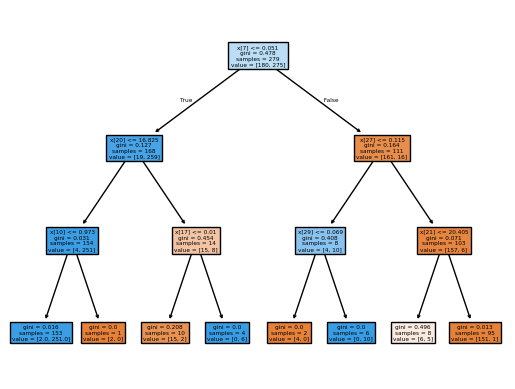

In [127]:
plot_tree(baggingestimator,filled=True)

In [102]:
y_predict=bagging.predict(x_test)
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.956140350877193

<Axes: >

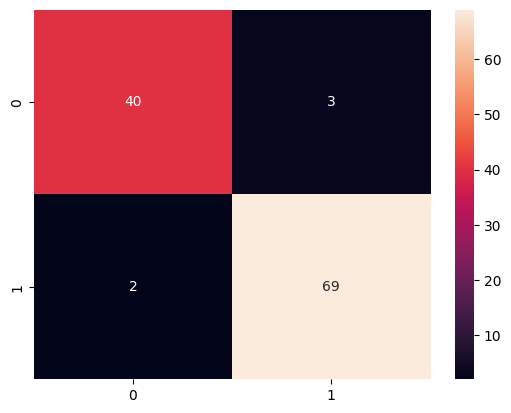

In [133]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)
import seaborn as sns 
sns.heatmap(c,annot=True)

<h5> aplying boosting </h5>

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
a=AdaBoostClassifier(estimator=decsiontree,n_estimators=100)

In [106]:
a.fit(x_train,y_train)

C:\Users\wwrao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [107]:
a.score(x_train,y_train)

1.0

In [108]:
y_pred=a.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [109]:
plott=a.estimators_[0]
plott

DecisionTreeClassifier(max_depth=3, random_state=284481614)

In [110]:
from sklearn.tree import plot_tree


[Text(0.5, 0.875, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [0.371, 0.629]'),
 Text(0.25, 0.625, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [0.035, 0.585]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 0.626\ngini = 0.037\nsamples = 263\nvalue = [0.011, 0.567]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [0.007, 0.565]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0.004, 0.002]'),
 Text(0.375, 0.375, 'x[1] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [0.024, 0.018]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0.0, 0.013]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [0.024, 0.004]'),
 Text(0.75, 0.625, 'x[27] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [0.336, 0.044]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[22] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [0.037, 0.04]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [0.009, 0.04]'),
 Text(0.6875, 0.125, 'gi

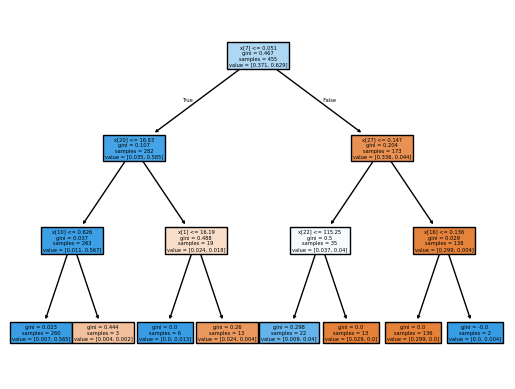

In [111]:
plot_tree(plott,filled=True)

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [116]:
print("accuracy score of boositng on testing dataset")
accuracy_score(y_test,y_pred)

accuracy score of boositng on testing dataset


0.9736842105263158

In [120]:
c=confusion_matrix(y_test,y_pred)
c

array([[41,  2],
       [ 1, 70]], dtype=int64)

In [118]:
import seaborn as sns

<Axes: >

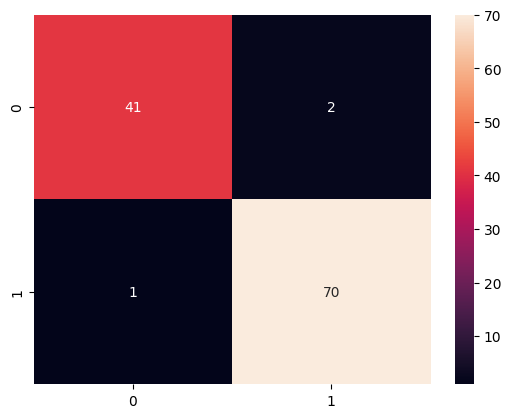

In [121]:
sns.heatmap(c,annot=True)